# Transformations

__Linear Regression Learning Objectives__ 
* Residual Plots
* Transformations Use Cases
* Common Transformation Methods 

__Salmon Learning Objectives__ 
* Residual Plots
* Transformations

In [15]:
import pandas as pd
from salmon import *
%matplotlib inline
plt.style.use('seaborn')

## Transformations
Sometimes, our data doesn't quite have a linear relationship. If we'd still like to perform linear regression on it, we need to perform a transformation on the x or y variable or both. 

### Diagonostic Plots
Before we start performing transformations, we need a method to determine whether or not a transformation is necessary. In simple linear regression, plots can be a useful tool in determining how well your data fits a linear relationship and if a transformation is necessary. A scatterplot can be decieving so it is best to always create these diagonostic plots early in your linear regression analysis.

#### Residual Plots
As a reminder, a residual is the difference between the actual and the predicted response variable. When we plot residuals, we plot the explanatory variable on the X axis and the residuals of the response variables. Residual plots are used for determining whether or not a linear model should be used for your dataset. If the residuals are randomly dispersed in the residual plot, then a linear model is appropriate. If the residual do not seem random or create a shape such as a U shape, a non-linear model may be more appropriate. Let's look at the scatter plot and residual plot of our speed of sound dataset using SALMON.

##### Residual Plots in SALMON
First, let's plot the frequency and length of the tube.

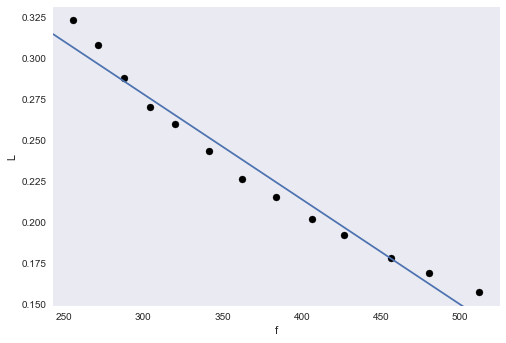

In [16]:
data = pd.read_csv("data/chapter3/speed_of_sound.csv")
explanatory = Q("f")
response = Q("L")
model = LinearModel(explanatory, response)
model.fit(data);
model.plot()

We can easily tell that there is a strong, negative correlation between frequency and the length of the tube. Without to much analysis, we could say that the relationship looks linear. But, let's create a residual plot to confirm. Residual plots are extremely easy in SALMON, simply call `.residual_plots()` on your linear model and a residual plot will be plotted.

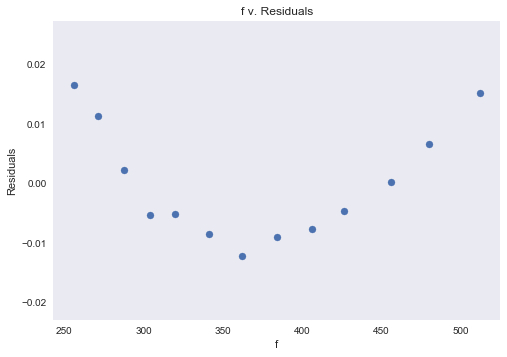

In [17]:
model.residual_plots()

Interestingly, while our scatter plot looked linear, our residual plot tells us something else. This pattern is definitely not random and could greatly benefit from a transformation.

### Nonlinear Transformations
The goal of a nonlinear transformation in linear regression is to _increase_ the linear relationship between variables. By transforming the variables, we are changing the correlation between them. Here are some common transformations.

| Method      | Transformation       | 
| :-----------: |:-------------:|
| Logarithmic        | log(x) or log(y) | 
| Square          | $x^2$ or $y^2$ |
| Cube          |$x^3$ or $y^3$ |
| Square Root          | $\sqrt{x}$ or $\sqrt{y}$ |
| Cube Root          | $\sqrt[3]{x}$ or $\sqrt[3]{y}$ |
| Reciprocal        |  1/x or 1/y |



The best way to find the best transformation for your data is __trial and error__. Let's go through a few of these are try to increase the linear relationship between the frequency and  length in the speed of sound dataset.

#### Logarithmic Transformation in SALMON
SALMON supports all of the common transformations. We'll start with applying a logarithmic transformation to our data. To create a logarithmic transformation, call `Log` on one of your Q variables. For this example, we will try our response variable, length, and look at the regression line and residual plots. Note, we are setting `original_y_space=False`, this will be explained later in chapter 4.

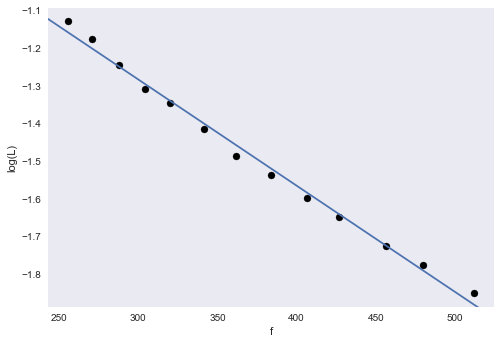

In [18]:
log_response = Log(response)
model = LinearModel(explanatory, log_response)
model.fit(data);
model.plot(original_y_space=False)

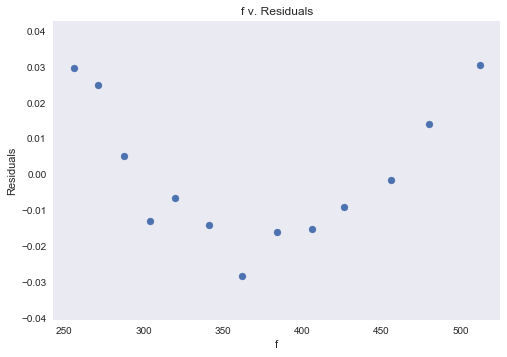

In [19]:
model.residual_plots()

The logarithmic transformation doesn't look like it affected the linear relationship at all. Let's try the square root transformation next.

#### Square Root Transformation in SALMON
SALMON does not have a square root function like the logarithmic transformation but it does support any power transformation to a variable. Since the square root can be represented as "to the .5 power" we can utilize this feature. For power transformation, just call `variable**power` where variable is the response or explanatory variable and power is the desired power.

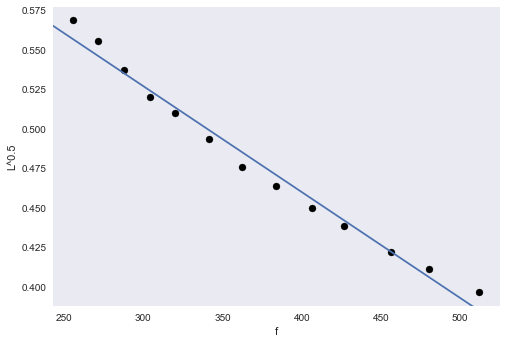

In [25]:
sqrt_response = response**(1/2)
model = LinearModel(explanatory, sqrt_response)
model.fit(data);
model.plot(original_y_space=False)

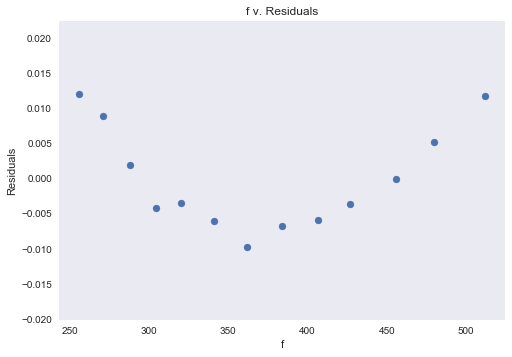

In [21]:
model.residual_plots()

Again, it looks like a square root transformation does not help our linear relationship. Let's try one more and perform a reciprocal transformation on x.

#### Reciprocal Transformations in SALMON
Taking the reciprocal of a variable is equivalent to raise the variable to -1 power. So we can use the power transformation in SALMON for this.

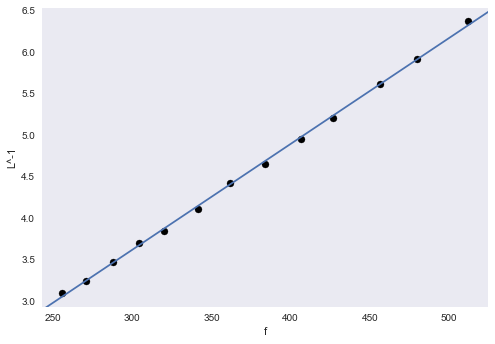

In [23]:
log_response = response**(-1)
model = LinearModel(explanatory, log_response)
model.fit(data);
model.plot(original_y_space=False)

From the scatter plot, we can seeing that the relationship went from strong and negative to strong and __positive__. The correlation switched to being positive and closer to one. Additionally, The points are a lot closer to the regression line. This looks promising that the linear relationship has increased, let's confirm our suspicions are true with a residual plot.

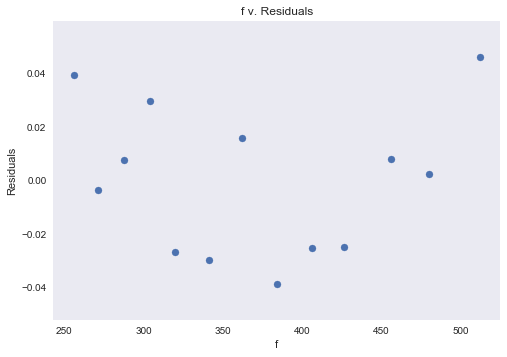

In [25]:
model.residual_plots()

Looking at the residual plot, there is no apparent shape. The residuals are random and thus the relationship is now strongly linear. As a reminder, we can also transform the explanatory variables, not just response, if it helps the model.